In [1]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
from sklearn.decomposition import NMF
from random import random
import matplotlib.pyplot as plt

In [2]:
my_data=pd.read_csv('all_data_filtered.csv')
my_data.head(10)
my_data.index=my_data['Patient_id']

In [3]:
my_data=my_data.drop(['Patient_id'],axis=1)
my_data.head()

,ENSG00000223972,ENSG00000227232,ENSG00000243485,ENSG00000268020,ENSG00000240361,ENSG00000186092,ENSG00000238009,ENSG00000233750,ENSG00000237683,ENSG00000268903,...,ENSG00000244656,ENSG00000263760,ENSG00000264728,ENSG00000238667,ENSG00000238477,ENSG00000271726,ENSG00000215616,ENSG00000265557,ENSG00000238643,MRD Response
Patient_id,,,,,,,,,,,,,,,,,,,,,
165-06,0.000000,24.743294,0.0,0.0,0.0,0.0,0.015504,0.029030,0.249525,0.000000,...,0.0,0.0,2.666607,1.999955,0.674782,0.0,0.0,0.0,0.0,0.0
031-31,0.000000,18.281501,0.0,0.0,0.0,0.0,0.000000,0.087378,11.042994,1.078417,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
069-02,0.062838,32.815619,0.0,0.0,0.0,0.0,0.000000,0.361829,27.015709,3.799909,...,0.0,0.0,0.000000,2.658880,2.018479,0.0,0.0,0.0,0.0,1.0
007-08,0.000000,17.226358,0.0,0.0,0.0,0.0,0.000000,0.018849,1.107071,0.190335,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
034-24,0.000000,13.274798,0.0,0.0,0.0,0.0,0.031994,0.039939,0.171643,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0


In [4]:
y=my_data['MRD Response']
X=my_data.drop(['MRD Response'],axis=1)

In [5]:
X

,ENSG00000223972,ENSG00000227232,ENSG00000243485,ENSG00000268020,ENSG00000240361,ENSG00000186092,ENSG00000238009,ENSG00000233750,ENSG00000237683,ENSG00000268903,...,ENSG00000240779,ENSG00000244656,ENSG00000263760,ENSG00000264728,ENSG00000238667,ENSG00000238477,ENSG00000271726,ENSG00000215616,ENSG00000265557,ENSG00000238643
Patient_id,,,,,,,,,,,,,,,,,,,,,
165-06,0.000000,24.743294,0.0,0.0,0.0,0.0,0.015504,0.029030,0.249525,0.000000,...,0.0,0.0,0.000000,2.666607,1.999955,0.674782,0.0,0.0,0.0,0.0
031-31,0.000000,18.281501,0.0,0.0,0.0,0.0,0.000000,0.087378,11.042994,1.078417,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
069-02,0.062838,32.815619,0.0,0.0,0.0,0.0,0.000000,0.361829,27.015709,3.799909,...,0.0,0.0,0.000000,0.000000,2.658880,2.018479,0.0,0.0,0.0,0.0
007-08,0.000000,17.226358,0.0,0.0,0.0,0.0,0.000000,0.018849,1.107071,0.190335,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
034-24,0.000000,13.274798,0.0,0.0,0.0,0.0,0.031994,0.039939,0.171643,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147-11,0.000000,16.848747,0.0,0.0,0.0,0.0,0.000000,0.077539,2.221555,0.130498,...,0.0,0.0,0.000000,0.593530,0.593530,1.201536,0.0,0.0,0.0,0.0
009-34,0.000000,10.145897,0.0,0.0,0.0,0.0,0.014844,0.264058,15.270377,1.192892,...,0.0,0.0,1.261392,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
104-22,0.023915,18.414594,0.0,0.0,0.0,0.0,0.023533,0.044066,0.457668,0.111245,...,0.0,0.0,0.000000,0.000000,0.505964,0.000000,0.0,0.0,0.0,0.0


In [6]:
X.shape

(491, 53966)

### Correlations analysis:

In [15]:
CorrPatients=np.corrcoef(X.values)
CorrGenes=np.corrcoef(X.values.T)
#voir la distribution des correlations (triangulaire sup)

/home/irit/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/irit/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [16]:
CorrGenes_triu=np.triu(CorrGenes)

: 

: 

(array([8.69400000e+03, 2.61983000e+06, 1.28729226e+09, 1.12905850e+09,
        3.20461276e+08, 1.07338110e+08, 4.10076500e+07, 1.33017840e+07,
        2.32911800e+06, 7.14872000e+05]),
 array([-0.3946767 , -0.25520903, -0.11574136,  0.02372631,  0.16319398,
         0.30266165,  0.44212932,  0.58159699,  0.72106466,  0.86053233,
         1.        ]),
 <BarContainer object of 10 artists>)

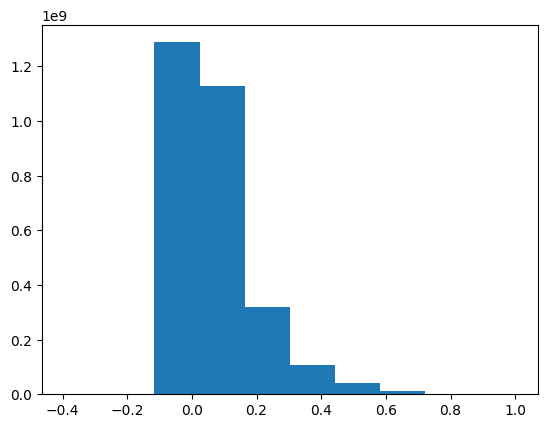

In [121]:
plt.hist(np.triu(CorrGenes))

(array([[368.,  65.,  34., ...,   3.,   4.,   1.],
        [418.,  42.,  10., ...,   0.,   5.,  11.],
        [368.,  75.,  21., ...,   1.,   4.,   9.],
        ...,
        [326.,  85.,  28., ...,   2.,   1.,   1.],
        [468.,  19.,   2., ...,   0.,   0.,   2.],
        [487.,   0.,   0., ...,   0.,   0.,   4.]]),
 array([2.62106139e-04, 1.00235896e-01, 2.00209685e-01, 3.00183474e-01,
        4.00157264e-01, 5.00131053e-01, 6.00104842e-01, 7.00078632e-01,
        8.00052421e-01, 9.00026211e-01, 1.00000000e+00]),
 <a list of 491 BarContainer objects>)

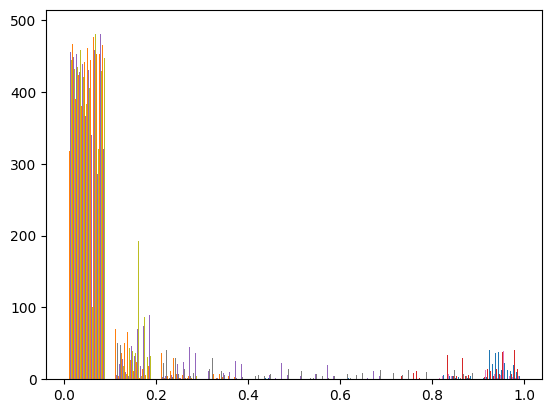

In [122]:
plt.hist(CorrPatients)

<Axes: >

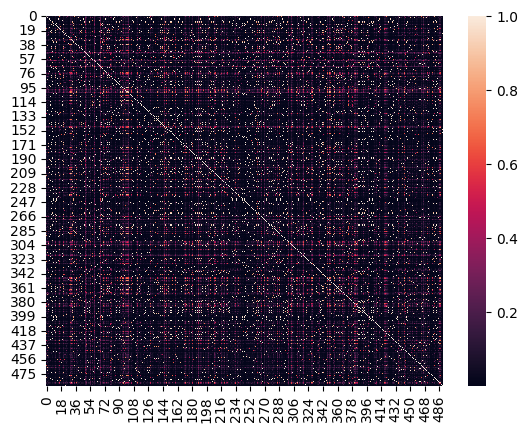

In [112]:
sns.heatmap(CorrPatients)

In [ ]:
#reordering columns according to MRD response

In [133]:
#reordering matrix
X_reordered=np.zeros(X.shape)
index_pos=np.where(y==1)[0]
index_neg=np.where(y==0)[0]

In [148]:
X.values[:,index_neg].shape

(491, 256)

In [150]:
X_reordered=np.concatenate((X.values[index_pos],X.values[index_neg]),axis=0)

In [152]:
CorrPatients_reordered=np.corrcoef(X_reordered)

In [143]:
X

,ENSG00000223972,ENSG00000227232,ENSG00000243485,ENSG00000268020,ENSG00000240361,ENSG00000186092,ENSG00000238009,ENSG00000233750,ENSG00000237683,ENSG00000268903,...,ENSG00000240779,ENSG00000244656,ENSG00000263760,ENSG00000264728,ENSG00000238667,ENSG00000238477,ENSG00000271726,ENSG00000215616,ENSG00000265557,ENSG00000238643
Patient_id,,,,,,,,,,,,,,,,,,,,,
165-06,0.000000,24.743294,0.0,0.0,0.0,0.0,0.015504,0.029030,0.249525,0.000000,...,0.0,0.0,0.000000,2.666607,1.999955,0.674782,0.0,0.0,0.0,0.0
031-31,0.000000,18.281501,0.0,0.0,0.0,0.0,0.000000,0.087378,11.042994,1.078417,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
069-02,0.062838,32.815619,0.0,0.0,0.0,0.0,0.000000,0.361829,27.015709,3.799909,...,0.0,0.0,0.000000,0.000000,2.658880,2.018479,0.0,0.0,0.0,0.0
007-08,0.000000,17.226358,0.0,0.0,0.0,0.0,0.000000,0.018849,1.107071,0.190335,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
034-24,0.000000,13.274798,0.0,0.0,0.0,0.0,0.031994,0.039939,0.171643,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147-11,0.000000,16.848747,0.0,0.0,0.0,0.0,0.000000,0.077539,2.221555,0.130498,...,0.0,0.0,0.000000,0.593530,0.593530,1.201536,0.0,0.0,0.0,0.0
009-34,0.000000,10.145897,0.0,0.0,0.0,0.0,0.014844,0.264058,15.270377,1.192892,...,0.0,0.0,1.261392,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
104-22,0.023915,18.414594,0.0,0.0,0.0,0.0,0.023533,0.044066,0.457668,0.111245,...,0.0,0.0,0.000000,0.000000,0.505964,0.000000,0.0,0.0,0.0,0.0


<Axes: >

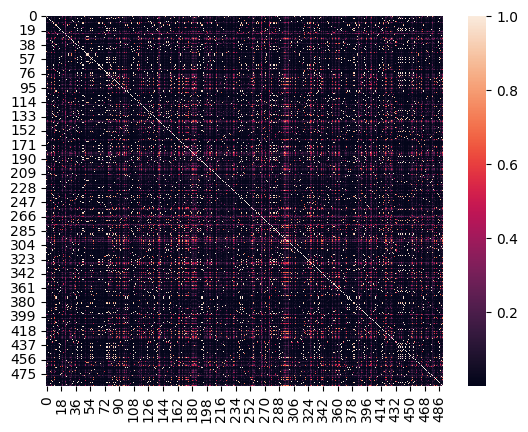

In [153]:
sns.heatmap(CorrPatients_reordered)

<Axes: >

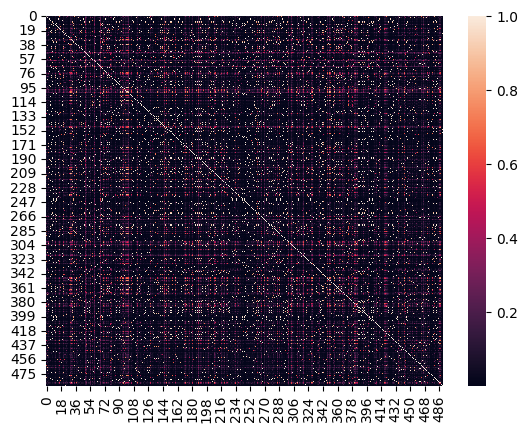

In [132]:
sns.heatmap(np.corrcoef(X))

In [155]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

plt.figure(figsize=(12,5))
dissimilarity = 1 - abs(CorrPatients)
print(dissimilarity.shape)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, X.columns, orientation='top', 
           leaf_rotation=90)

(491, 491)


ValueError: Distance matrix 'X' must be symmetric.

<Figure size 1200x500 with 0 Axes>

### NMF :

In [7]:
n_samples=X.shape[0]
n_genes=X.shape[1]

In [8]:
class nmf_model():
    def __init__(self,X) :
        self.data=X
        self.n_runs=100
        self.A_k=None
        self.best_k=None
        self.delta_k=None
        self.best_k=None
        self.model=None
        self.W=None
        self.H=None
    
    #Returns consensus matrix, which is the averaged connectivity matrix on several runs of the algorithm
    def get_consensus_matrix(self,n_components):
        model=NMF(n_components,init='random')
        M_k=np.zeros((n_samples,n_samples))
        for i in range (self.n_runs):
            W=model.fit_transform(self.data)
            H=model.components_
            n_metagenes=H.shape[0]

            #calculate Connectivity matrix
            clusters=np.zeros(n_samples)
            C=np.zeros((n_samples,n_samples))

            for i in range (n_samples):
                clusters[i]=np.argmax(H[:,i])

            for i in range (n_samples):
                for j in range (i,n_samples):
                    if (clusters[i]==clusters[j]):
                        C[i,j]=1
                    else:
                        C[i,j]=0
        
            M_k=M_k+C
            return M_k/self.n_runs
        
    #To evaluate model stability
    def get_consensus_distribution (self,M_k):
        list_entries=M_k.ravel()
        hist, bins=np.histogram(list_entries, density=True)
        #calculate CDF
        cdf=np.cumsum(hist)
        return bins, hist, cdf

    def model_selection(self):
        list_k=[2,5,10,20]
        self.A_k=np.zeros(len(list_k))
        for i in range(len(list_k)):
            Ck=self.get_consensus_matrix(list_k[i])
            bins,hist,cdf=self.get_consensus_distribution(Ck)
            self.A_k[i] = np.sum(h*(b-a) for b,a,h in zip(bins[1:],bins[:-1],cdf))
        #differences between areas under CDFs
        self.delta_k=np.array([(Ab-Aa)/Aa if i>2 else Aa 
                               for Ab,Aa, i in zip(self.A_k[1:],self.A_k[:-1],range(len(list_k)))])
        self.best_k=list_k[np.argmax(self.delta_k)]
    
    def build_best_model(self):
        self.model=NMF(n_components=self.best_k)
        self.W=self.model.fit_transform(self.data)
        self.H=self.model.components_
        print(H)

        

In [9]:
my_model=nmf_model(X)
my_model.build_best_model()

: 

: 

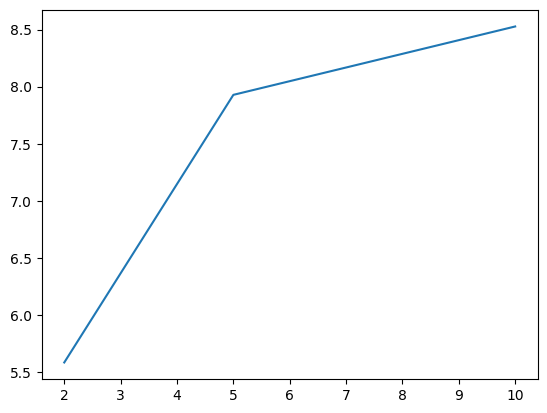

In [32]:
plt.plot([2,5,10],my_model.delta_k)

In [44]:
import numpy as np
from sklearn.decomposition import NMF
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, cophenet

# Generate some sample data
X = np.random.rand(100, 10)
# Apply NMF to the data
model = NMF(n_components=2, init='random', random_state=0)
X = model.fit_transform(X)
H=model.components_
# Calculate pairwise distance matrix
dist_matrix = pdist(X)
print(dist_matrix)
# Apply hierarchical clustering
linkage_matrix = linkage(dist_matrix, method='ward')
# Calculate cophenetic correlation coefficient
coph_corr, coph_dist = cophenet(linkage_matrix, dist_matrix)

print("Cophenetic correlation coefficient:", coph_corr)

[0.12858969 0.26749319 0.25900064 ... 0.36426651 0.2064698  0.20678569]
Cophenetic correlation coefficient: 0.6318492580993474


In [47]:
n_samples=X.shape[0]

In [105]:
#test color map
model=NMF(n_components=2)
W=model.fit_transform(X.T)
H=model.components_

In [55]:
W.shape

(53966, 2)

In [56]:
H.shape

(2, 491)

In [57]:
clusters=np.zeros(n_samples)

for i in range (n_samples):
    clusters[i]=np.argmax(H[:,i])

In [58]:
clusters.shape

(491,)

In [ ]:
c=0
for i in range (len(clusters)):
    if clusters[i]==0:
        c+=1
        print('hallelujah')

In [60]:
c

120

<Axes: >

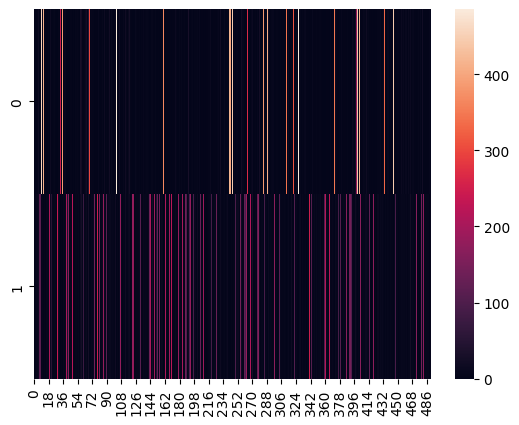

In [61]:
sns.heatmap(H)

In [11]:
H.shape

(2, 53966)

In [69]:
y

Patient_id
165-06    0.0
031-31    1.0
069-02    1.0
007-08    0.0
034-24    1.0
         ... 
147-11    1.0
009-34    0.0
104-22    1.0
909-03    1.0
029-12    1.0
Name: MRD Response, Length: 491, dtype: float64

In [63]:
import numpy as np
a = np.array([[10, 20, 30, 40, 50],
             [ 6,  7,  8,  9, 10]])
permutation = [0, 4, 1, 3, 2]
idx = np.empty_like(permutation)
idx[permutation] = np.arange(len(permutation))
a[:, idx]  # return a rearranged copy

a[:] = a[:, idx]  # in-place modification of a


In [106]:
#reordering matrix
H_reordered=np.zeros(H.shape)
index_pos=np.where(y==1)[0]
index_neg=np.where(y==0)[0]

In [113]:
H_reordered=np.concatenate((H[:,index_pos],H[:,index_neg]),axis=1)

<Axes: >

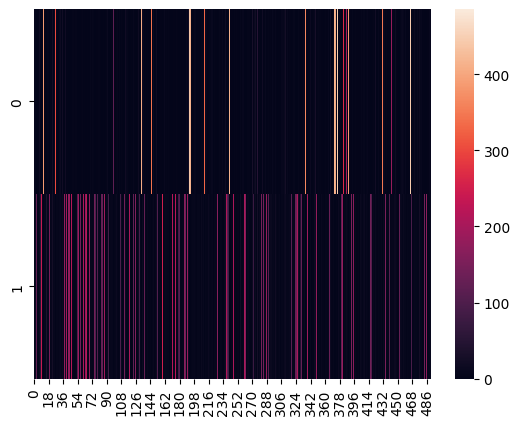

In [108]:
sns.heatmap(H_reordered)

<Axes: >

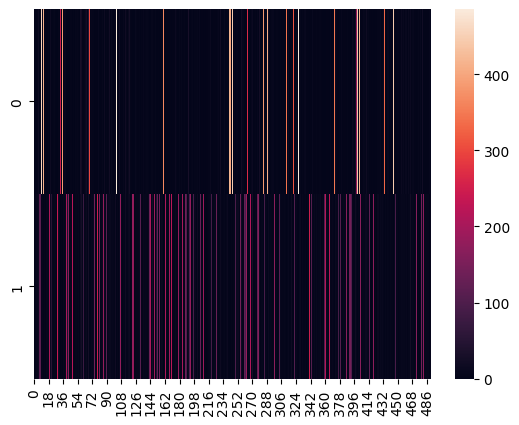

In [109]:
sns.heatmap(H)

In [94]:
H[:,index_pos].shape

(2, 235)

In [103]:
H

array([[1.95918492e+00, 9.29074538e+00, 3.28495855e+00, 3.58503356e+00,
        3.87480995e+00, 1.87659481e+01, 0.00000000e+00, 5.82030254e-01,
        0.00000000e+00, 4.53970868e+02, 1.70836659e+00, 1.64343980e+00,
        4.15036641e+02, 2.02771821e+00, 2.53036817e+00, 3.20690228e+00,
        3.81317275e+00, 2.12106870e+00, 4.64972143e+00, 0.00000000e+00,
        1.65291294e+01, 2.75245764e+00, 4.76325758e+00, 2.76954253e+00,
        4.27335251e+00, 7.02640917e+00, 1.97903807e+00, 3.13549888e+00,
        1.78415025e+00, 1.44295986e-01, 7.34225818e+00, 3.39829762e+00,
        1.62223478e+00, 2.43827645e+02, 2.53551037e+00, 3.85970863e+02,
        3.75521349e+00, 4.15128336e+00, 8.11374823e+00, 8.84220559e+00,
        0.00000000e+00, 8.19858353e-01, 2.34644445e+01, 0.00000000e+00,
        1.65486058e+00, 4.17954577e+00, 3.89490199e+00, 0.00000000e+00,
        1.69226921e+01, 5.37700128e+00, 9.00471447e-01, 6.86371817e+00,
        3.85340961e+00, 0.00000000e+00, 7.47339114e+00, 5.541464

In [104]:
H_reordered

array([[9.29074538e+00, 3.28495855e+00, 3.87480995e+00, 5.82030254e-01,
        1.70836659e+00, 2.02771821e+00, 3.81317275e+00, 1.65291294e+01,
        2.75245764e+00, 1.44295986e-01, 3.39829762e+00, 2.43827645e+02,
        3.85970863e+02, 3.75521349e+00, 4.15128336e+00, 8.19858353e-01,
        0.00000000e+00, 6.86371817e+00, 3.85340961e+00, 0.00000000e+00,
        7.47339114e+00, 5.54146452e+00, 2.69795365e+00, 2.24057915e+01,
        2.79106549e+00, 1.05385246e+01, 3.01536282e+02, 6.88367433e+00,
        5.18990493e+00, 3.07531735e+00, 1.95191189e+00, 1.01217916e+01,
        1.83184541e+00, 1.54825240e+01, 1.77566644e+00, 2.17337737e+01,
        2.79323348e+00, 4.85762109e+02, 0.00000000e+00, 1.94124846e+01,
        0.00000000e+00, 2.20536075e+00, 4.27323785e+00, 0.00000000e+00,
        0.00000000e+00, 1.63424222e+00, 0.00000000e+00, 4.62716569e+00,
        2.77619752e+00, 3.92032564e+00, 2.27783498e+00, 4.08217008e+00,
        5.34005673e+00, 6.37245805e+00, 3.74846585e-01, 0.000000

In [156]:
sns.heatmap(X)

<Axes: ylabel='Patient_id'>

: 

: 